In [1]:
%run -i imports.py
%run -i config.py
%run -i model.py
%run -i shax.py

In [2]:
config.lamp_substep = 4
config.shac_M = 10_000
# config.lamp_dt = 0.1 / config.lamp_substep

  0%|          | 0/10001 [00:00<?, ?it/s]

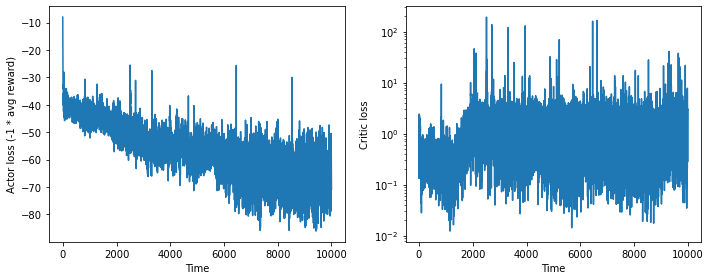

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/10001 [00:00<?, ?it/s]

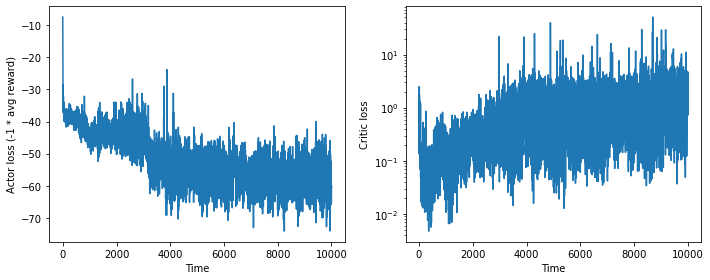

  0%|          | 0/1201 [00:00<?, ?it/s]

  0%|          | 0/10001 [00:00<?, ?it/s]

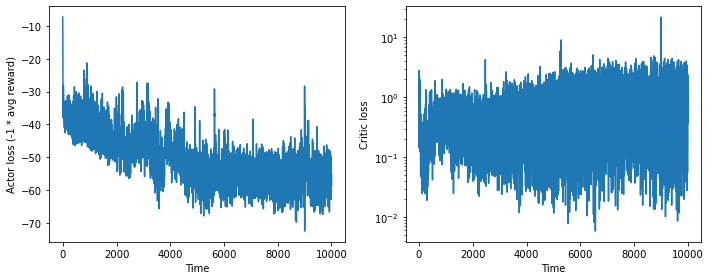

  0%|          | 0/1201 [00:00<?, ?it/s]

In [3]:
for m in [0.1, 0.5, 0.9]:
    mdp = mdp_t(make_init(m), observe, step, terminate)
    theta, phi = shax(mdp)

    with open(f'weights/xtheta-{m}.bin', 'wb') as f:
        f.write(flax.serialization.to_bytes(theta))

    with open(f'weights/xphi-{m}.bin', 'wb') as f:
        f.write(flax.serialization.to_bytes(phi))

    display(make_video(mdp, theta, phi, name=m, frames=1200, skip=2))
    # display(Audio('done.mp3', autoplay=True))
    
    ns.notify(f':banana: - {m}')

In [4]:
display(Video('out-0.1.mp4', html_attributes='autoplay controls loop'))
display(Video('out-0.5.mp4', html_attributes='autoplay controls loop'))
display(Video('out-0.9.mp4', html_attributes='autoplay controls loop'))